In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [68]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 차원축소 

- dimension reduction
- 차원(dimension)이란? 데이터를 구성하고 있는 속성의 갯수 
- 차원 축소란? 높은 차원의 데이터를 낮은 차원으로 줄여 특징을 살펴보는 기법
- 데이터의 차원이 커지면 커질수록 계산 복잡도와 정확도가 떨어진다. 다차원 데이터를 설명할 수 있는 핵심 축을 찾는다면, 작은 차원으로 모든 데이터를 설명할 수 있다.
- 차원 축소에서는 데이터의 분산이 가장 크게 나타나는 방향을 찾는 것이 가장 중요하며 첫 방향을 1번째 주성분(1st PC. (principal component)라고 한다. 

- PCA(principal component) : 
- https://www.freecodecamp.org/news/the-curse-of-dimensionality-how-we-can-save-big-data-from-itself-d9fa0f872335/




<img src="img/dimension1.jpg" width='600'>


# 차원의 저주 현상

- Curse of Dimensionality
- 차원이 높아지면 데이터의 밀집도가 증가하여 모든 것이 작아지고 부족하게 되는 현상.
- 데이터의 차원이 커질 수록 필요한 데이터의 수가 그만큼 증가하게 되고, 이에 따라 모델의 성능이 저하되는 현상. 또한 동시에 데이터 간의 거리가 벌어져 밀도가 희소해지는데(sparse), 이런 경우 거리에 기반한 알고리즘 성능이 매우 떨어진다


- 데이터의 밀집도 (Data Density)
    - 차원이 다르면 Data의 밀집도가 달라진다.
    - N개의 Data를 서로 다른 차원에서 다룰때 데이터의 밀집도가 달라지는 모습을 표현하고 있다.
    - 1차원에서 데이터의 밀집도는 N/5로 하나의 큐브는 N/5 샘플을 가진다.
    - 2차원에서 데이터의 밀집도는 N/25로 하나의 큐브는 N/25 샘플을 가진다.
    - 3차원에서 데이터의 밀집도는 N/125로 하나의 큐브는 N/125 샘플을 가진다.
    - 차원이 높아지면 데이터의 밀집도는 작아지는 것을 볼 수 있다.
    
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FeqhE2m%2FbtqB3phXvI5%2F9JTu6FPahVbeOkv0HlKWpK%2Fimg.png'>
    


# PCA

- Principal Component
- 기존 raw 데이터에 존재하는 Feature 들로 새로운 Feature 를 생성하여 Feature 를 줄여나가는 방식
- 데이터의 분산(Variance)을 최대한 보존하면서 서로 직교하는 축을 찾아 고차원의 공간의 표본을 저 차원으로 변환하는 차원 축소 기법
- 기존의 축이 아닌 새로운 축을 찾는다 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbHso5m%2FbtqNCdErDdE%2FuvG1g8UkuJetTDXPlVCFK0%2Fimg.png' width='300'>

```
from sklearn.decomposition import PCA

# pca 객체 정의. n_components 는 차원의 수 = 피처 개수
pca = PCA(n_components=2)

# 2차원 PCA값으로 각 데이터 차원축소
pca_transformed = pca.fit_transform(Xdata)

# 별도 변수로 저장 
pca_x = pca_transformed[:,0]
pca_y = pca_transformed[:,1]

```

## 붓꽃 데이타셋에 PCA 차원 축소 적용 


In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data , columns=columns)
iris_df['target']=iris.target
iris_df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,target
56,6.3,3.3,4.7,1.6,1
113,5.7,2.5,5.0,2.0,2
116,6.5,3.0,5.5,1.8,2


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

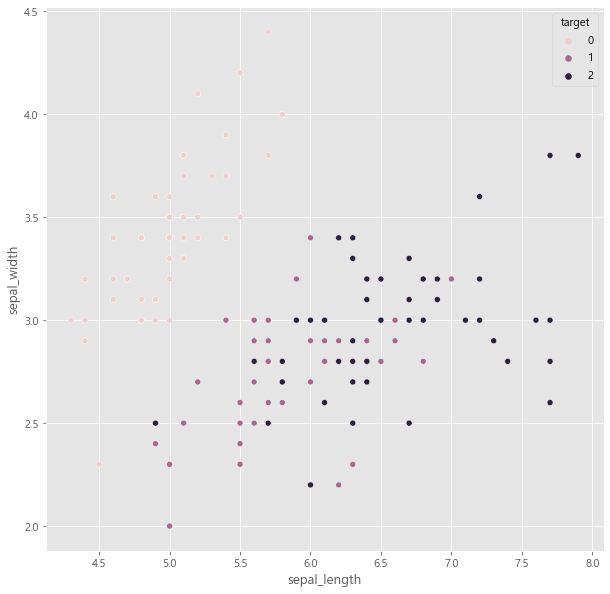

In [6]:
#기존 차원 이용 sepal_length * sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris_df, hue='target')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

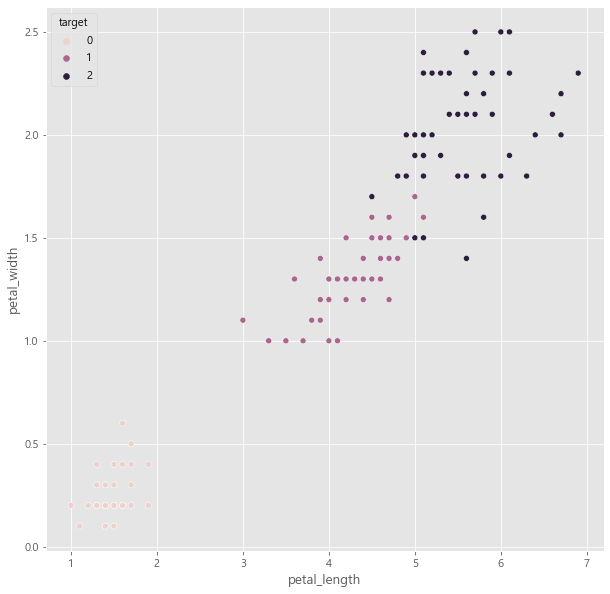

In [7]:
#기존 차원 이용 petal_length * petal_width
sns.scatterplot(x='petal_length', y='petal_width', data=iris_df, hue='target')

In [8]:
#PCA는 스케일링 필수
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris.data)
iris_scaled = scaler.fit_transform(iris.data)

In [10]:
iris_scaled.shape

(150, 4)

In [9]:
iris_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

** PCA 변환 수행 **
    
    4차원 -> 2차원

In [14]:
from sklearn.decomposition import PCA

#PCA 객체 생성
pca = PCA(n_components=2)

#차원 축소 후 변수에 저장
pca_transformed = pca.fit_transform(iris.data)

#(행수, n_components)
pca_transformed.shape

print(pca_transformed[:3])
print(iris.data[:3])

#PCA 작업 후 데이터프레임에 추가
iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.sample(3)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


,sepal_length,sepal_width,petal_length,petal_width,target,pca_x,pca_y
46,5.1,3.8,1.6,0.2,0,-2.538148,0.503771
109,7.2,3.6,6.1,2.5,2,2.916751,0.782792
126,6.2,2.8,4.8,1.8,2,1.258508,-0.179705


<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

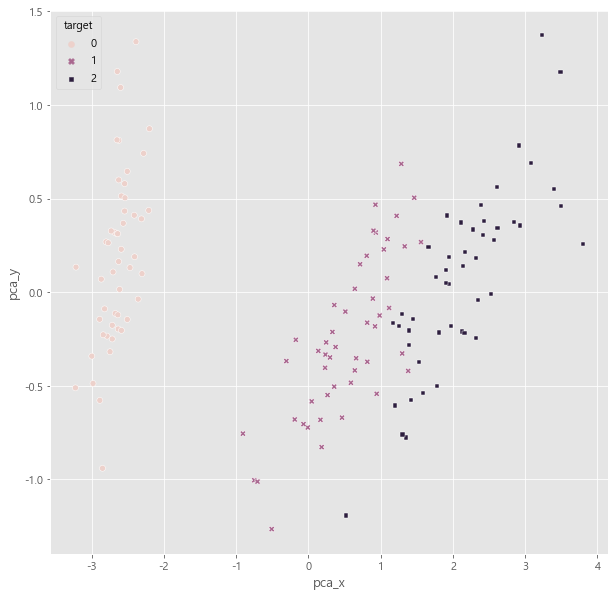

In [15]:
#PCA 작업 결과물로 시각화
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df, hue='target', style='target')

### 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교 **

In [16]:
#KNN 원본 데이터를 이용한 분류 모델 작업 및 성능 평가
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=iris.target)

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

1.0

In [18]:
#X_train

In [19]:
#PCA 변환된 데이터를 이용한 분류 모델 작업 및 성능 평가

#차원 축소 후 변수에 저장
pca_transformed = pca.fit_transform(iris.data)

#(행수, n_components)
pca_transformed.shape

#X는 차원 축소된 결과 X
X_train, X_test, y_train, y_test = train_test_split(pca_transformed, iris.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=iris.target)

model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
model_kn.score(X_test, y_test)

1.0

In [ ]:
#본래 스케일링된 데이터를 넣는 게 정상이나 해당 데이터의 경우 차이 X

# 퀴즈 : 
펭귄 데이타를 이용하여 PCA 데이타를 이용할때와 원본 데이타를 이용할 때 분류 모델에 성능의 차이가 있는지 확인하여라.
분류 모델은 임의로 지정한다. 

sns.load_dataset('penguins')

In [ ]:
sns.load_dataset('penguins')

# Digit

    0~9 숫자 이미지 / 2차원 데이터 / 3차원 데이터

In [20]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [26]:
#2차원
print(digits.data.shape, digits.data.ndim)
digits.data

(1797, 64) 2


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [27]:
#3차원
print(digits.images.shape, digits.images.ndim)
digits.images

(1797, 8, 8) 3


array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [28]:
#data의 라벨명
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
#data의 컬럼명
print(len(digits.feature_names))

64


In [31]:
#2차원 데이터 -> 데이터프레임화
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df['target'] = digits.target
digits_df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [32]:
digits_df.shape

(1797, 65)

In [33]:
digits_df.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

In [34]:
digits_df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
digits_df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [35]:
#3차원 데이터
digits.images.shape

(1797, 8, 8)

In [37]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

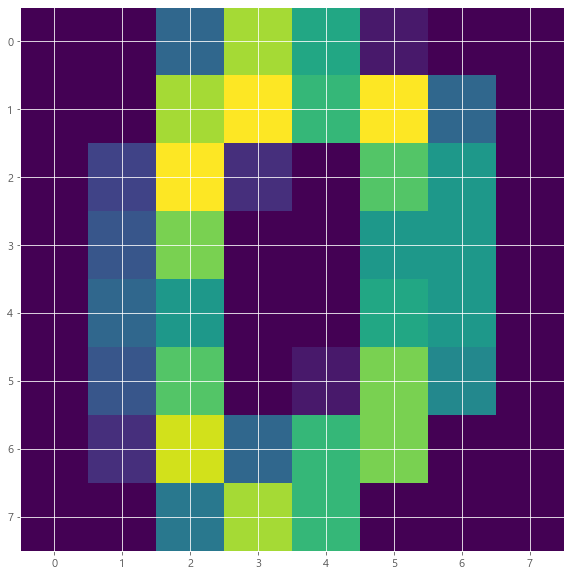

In [39]:
#3차원 이미지를 plt.imshow()를 이용해 시각화
plt.imshow(digits.images[0])

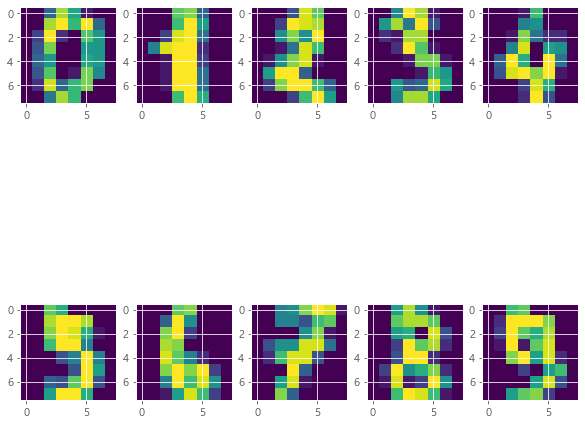

In [40]:
fig, axes = plt.subplots(2, 5)
# axes[0,0].imshow(digits.images[9])
num = 0
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(digits.images[num])
        num += 1


In [41]:
digits_df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
394,0.0,0.0,1.0,6.0,8.0,9.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,9.0,2.0,0.0,0.0,8
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9
1547,0.0,0.0,5.0,13.0,7.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,4.0,8.0,10.0,16.0,12.0,1.0,2


In [42]:
#64개 -> 2개
pca = PCA(n_components=2)

pca_transformed = pca.fit_transform(digits.data)

digits_df['pca_x'] = pca_transformed[:,0]
digits_df['pca_y'] = pca_transformed[:,1]
digits_df.sample(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,pca_x,pca_y
1442,0.0,0.0,1.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,...,0.0,3.0,16.0,2.0,0.0,0.0,0.0,7,2.472434,-12.897144
184,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,12.0,14.0,13.0,12.0,5.0,0.0,2,0.237564,-4.679719
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9,-5.480201,8.076331


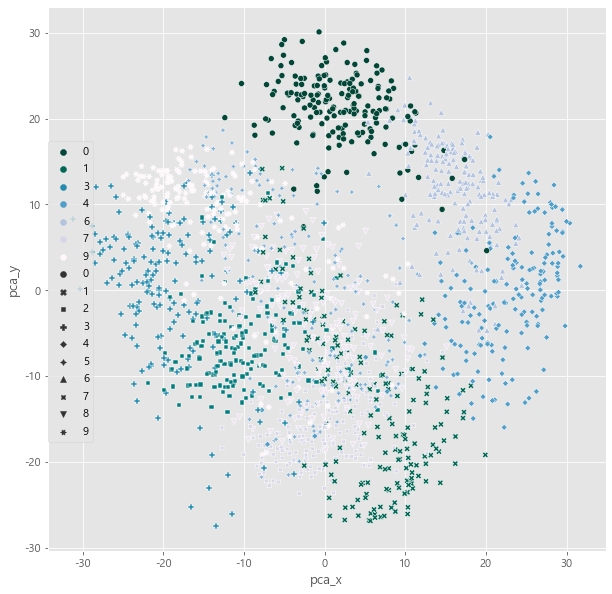

In [43]:
sns.scatterplot(x='pca_x', y='pca_y', data=digits_df, hue='target', palette='PuBuGn_r', style='target')
plt.legend(loc=[0,0.2])

In [ ]:
#번호 + 모양 합쳐서 한 번에 보는 건 불가

### 10차원

In [45]:
#64개 -> 10개
pca = PCA(n_components=10)

pca_transformed = pca.fit_transform(digits.data)
pca_transformed.shape

(1797, 10)

In [46]:
#임의의 열 지정
columns_list = ['pca'+str(i) for i in range(10)]
columns_list

['pca0',
 'pca1',
 'pca2',
 'pca3',
 'pca4',
 'pca5',
 'pca6',
 'pca7',
 'pca8',
 'pca9']

In [47]:
#데이터프레임화
df_pca = pd.DataFrame(pca_transformed, columns=columns_list)
df_pca['target'] = digits.target
df_pca.head(2)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,target
0,-1.259421,21.274839,-9.462944,13.014977,-7.130471,-7.442086,3.253827,2.538588,-0.576049,3.631137,0
1,7.957705,-20.768754,4.439652,-14.892985,5.894329,-6.484257,2.133412,-4.632063,3.594247,-1.076351,1


In [48]:
#로지스틱 분류기 적용 - 원본
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=digits.target)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.9583333333333334

In [49]:
#로지스틱 분류기 적용 - pca_transformed 10개 데이터
X_train, X_test, y_train, y_test = train_test_split(pca_transformed, digits.target, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=digits.target)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.9527777777777777

#### 번외) 이미지를 넘파이 배열로 변환하기

In [ ]:
# conda install opencv

In [53]:
#pip list

In [62]:
import cv2
cv2.__version__

'4.0.1'

In [70]:
# 이미지(png, jpg)
img_path = 'img/berry.jpg'
# img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(img_path)
img.shape

(435, 450, 3)

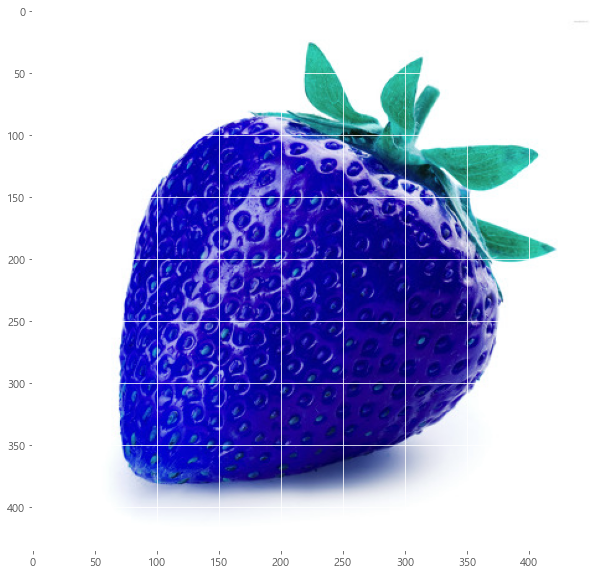

In [71]:
plt.imshow(img)

In [72]:
# 이미지 크기 줄이기 
img_resized = cv2.resize(img, dsize=(7, 7))

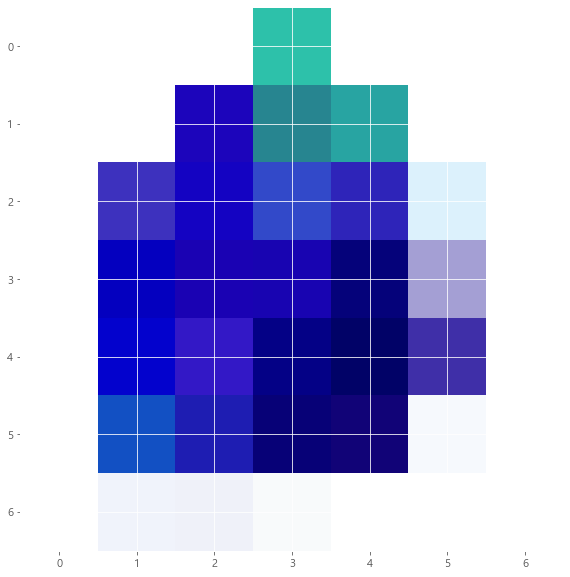

In [73]:
plt.imshow(img_resized)